## Introduction des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

X_test=testData.iloc[:,:].values
print(trainData.shape)
print(testData.shape)
print(X_test.shape)

(42000, 785)
(28000, 784)
(28000, 784)


In [2]:
trainData.sample(frac=1).head(100)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21545,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5559,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35863,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34839,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25935,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36868,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7223,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
testData.sample(frac=1).head(100)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


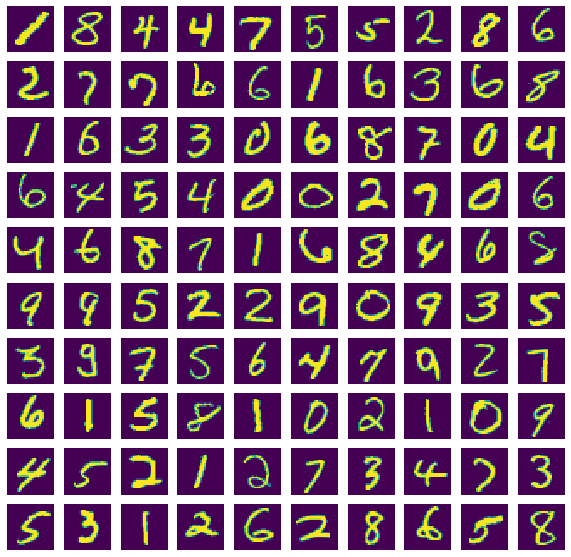

In [4]:
# for i in range(10):
#     plt.imshow(X_test[i].reshape(28,28))

_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X_test[np.random.randint(X_test.shape[0])].reshape(28,28))          
       axarr[i,j].axis('off')  

## Logistic Regression - Sur une partie des données

In [5]:
vecTrain = trainData.iloc[:5000,1:].to_numpy()

In [6]:
vecTrain.shape

(5000, 784)

In [8]:
vecTrain_Lebel = trainData.iloc[:5000,:1].to_numpy().T

In [9]:
vecTrain_Lebel = vecTrain_Lebel[0,]

In [10]:
vecTrain_Lebel.shape

(5000,)

In [11]:
print(vecTrain_Lebel)

[1 0 1 ... 8 7 9]


In [12]:
import time
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vecTrain, vecTrain_Lebel, test_size=0.25, random_state=0)

t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = logisticRegr.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))

Training time: 28.328852s; Prediction time: 0.006002s


### Tests unitaires

In [14]:
print(x_train.shape)
print(x_test.shape)

(3750, 784)
(1250, 784)


[2]


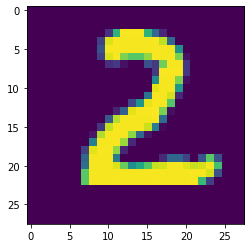

In [16]:
xNum = x_test[1249].reshape(1,-1)
plt.imshow(xNum.reshape(28,28)) 

print(logisticRegr.predict(xNum))

[1]


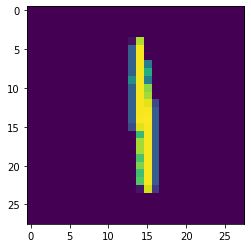

In [17]:
plt.imshow(X_test[5000].reshape(28,28)) 

print(logisticRegr.predict(X_test[5000].reshape(-1, 1).T))

### Accuracy

In [235]:
accuracy = logisticRegr.score(x_test, y_test)
print(accuracy)

0.8848


## Logistic Regression - 42000 Numbers ?

In [19]:
vecTrainDataTotal = trainData.iloc[:,1:].to_numpy()
vecTrainData_Lebel = trainData.iloc[:,:1].to_numpy().T[0]

print(vecTrainDataTotal.shape)
print(vecTrainData_Lebel.shape)

(42000, 784)
(42000,)


In [223]:
x_train, x_test, y_train, y_test = train_test_split(vecTrainDataTotal, vecTrainData_Lebel, test_size=0.25, random_state=0)

t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = logisticRegr.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))

Training time: 669.521206s; Prediction time: 0.055068s


C:\Users\minglei.jiang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Réduction de dimensionnalité
Nous pouvons vouloir réduire la dimension de nos caractéristiques si nous avons beaucoup de données redondantes.

In [20]:
X_test[5000].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         11, 225,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         78, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Principal Component Analysis - l'analyse des composantes principales

![PCA Example](Images/PCA06.jpg)

### Normalizing the Data

Nos données d'entrée sont un peu désordonnées - grilles 28x28 de valeurs avec une échelle non standard. Il est utile de mettre à l'échelle les variables d'entrée à l'aide d'un objet StandardScaler scikit-learn. Cela mettra à l'échelle les variables afin qu'elles aient une moyenne nulle et un écart type d'environ 1.

In [21]:
%matplotlib inline

# numbers
import numpy as np
import pandas as pd

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re
from pprint import pprint

def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(vecTrainDataTotal)

In [25]:
print(X_std.shape)
print(X_std[5000])

(42000, 784)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00528064 -0.00687837 -0.00487956 -0.00487956  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00487956 -0.00562918 -0.00932058 -0.01179981
 -0.01630617 -0.02037525 -0.02595147 -0.02996432 -0.03191077 -0.03224868
 -0.03254223 -0.02992467 -0.02981959 -0.0279073  -0.02351481 -0.01758085
 -0.01536566 -0.00963815 -0.00830613 -0.00523595  0.          0.
  0.          0.          0.          0.         -0.00487956 -0.00487956
 -0.00800885 -0.01142835 -0.01984611 -0.02788435 -0.03926102 -0.05330587
 -0.06750354 -0.08468048 -0.10218314 -0.11898204 -0.13296252 -0.14103566
 -0.13933272 -0.13076593 -0.11785894 -0.10037613 -0.07800373 -0.05610005
 -0.03921238 -0.02386099 -0.01372987 -0.00805699  0.          0.
  0.          0.     

In [26]:
vecTrainDataTotal.shape

(42000, 784)

In [254]:
print(X_std[5000])
print(vecTrainDataTotal[5000])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00528064 -0.00687837 -0.00487956 -0.00487956  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00487956 -0.00562918 -0.00932058 -0.01179981
 -0.01630617 -0.02037525 -0.02595147 -0.02996432 -0.03191077 -0.03224868
 -0.03254223 -0.02992467 -0.02981959 -0.0279073  -0.02351481 -0.01758085
 -0.01536566 -0.00963815 -0.00830613 -0.00523595  0.          0.
  0.          0.          0.          0.         -0.00487956 -0.00487956
 -0.00800885 -0.01142835 -0.01984611 -0.02788435 -0.03926102 -0.05330587
 -0.06750354 -0.08468048 -0.10218314 -0.11898204 -0.13296252 -0.14103566
 -0.13933272 -0.13076593 -0.11785894 -0.10037613 -0.07800373 -0.05610005
 -0.03921238 -0.02386099 -0.01372987 -0.00805699  0.          0.
  0.          0.         -0.005244

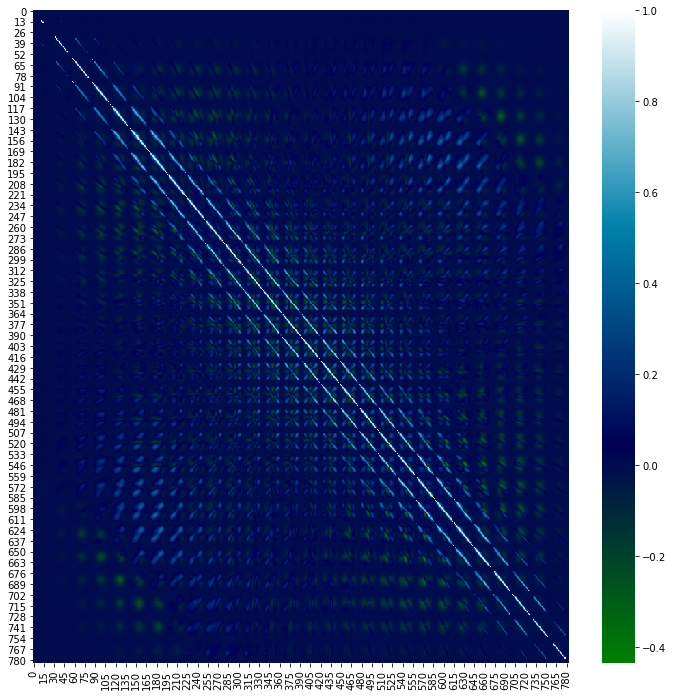

In [27]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(X_cov), annot=False, cmap='ocean')
plt.show()

In [28]:
eigenvals, eigenvecs = np.linalg.eig(X_cov)

# Eigenvalues are not necessarily sorted, but eigenval[i] *does* correspond to eigenvec[i]

print ("Eigenvals shape: ", eigenvals.shape)
print ("Eigenvecs shape: ", eigenvecs.shape)

Eigenvals shape:  (784,)
Eigenvecs shape:  (784, 784)


In [266]:
eigenvals

array([4.06964787e+01, 2.91114657e+01, 2.67833371e+01, 2.08147194e+01,
       1.81000206e+01, 1.57876737e+01, 1.38244007e+01, 1.25432643e+01,
       1.10638975e+01, 1.00889267e+01, 9.63617203e+00, 8.65579470e+00,
       8.04120472e+00, 7.88086691e+00, 7.43637560e+00, 7.16743699e+00,
       6.73538375e+00, 6.61651973e+00, 6.42354578e+00, 6.26826675e+00,
       5.93960379e+00, 5.74928832e+00, 5.48826880e+00, 5.32649477e+00,
       5.15217038e+00, 4.94730998e+00, 4.88853571e+00, 4.70777145e+00,
       4.46528559e+00, 4.36351702e+00, 4.32543150e+00, 4.22712324e+00,
       4.08726514e+00, 4.06176768e+00, 3.99903435e+00, 3.86804997e+00,
       3.81925839e+00, 3.71256507e+00, 3.57437538e+00, 3.45887625e+00,
       3.41436841e+00, 3.36945857e+00, 3.25693182e+00, 3.24008824e+00,
       3.18312949e+00, 3.16286640e+00, 3.14244041e+00, 3.09287815e+00,
       3.06368054e+00, 3.02342271e+00, 2.96849737e+00, 2.91830693e+00,
       2.84948896e+00, 2.82806029e+00, 2.79589667e+00, 2.76696531e+00,
      

In [29]:
lam_sum = sum(eigenvals)
explained_variance = [(lam_k/lam_sum) for lam_k in sorted(eigenvals, reverse=True)]

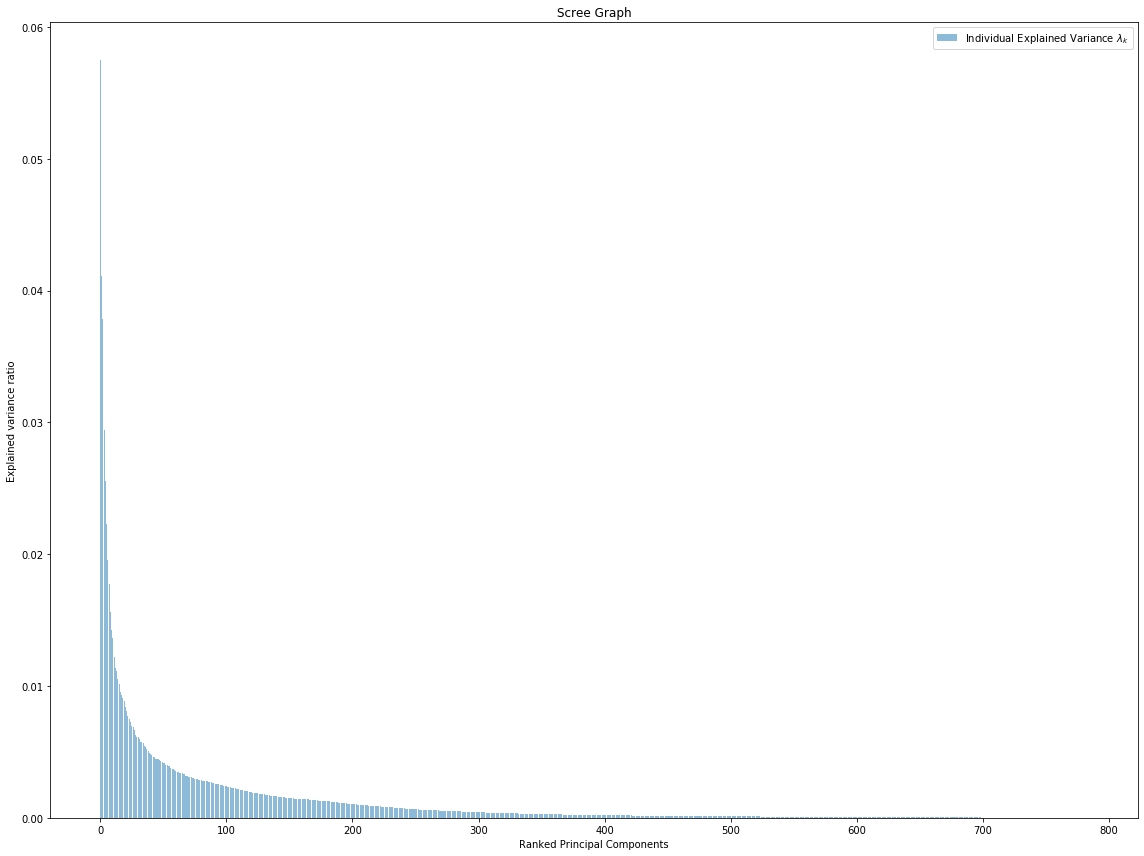

In [30]:
plt.figure(figsize=(16, 12))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='Individual Explained Variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

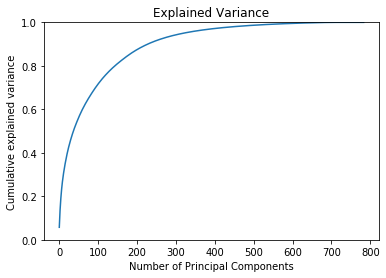

In [31]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.plot(np.cumsum(explained_variance))

ax1.set_ylim([0,1.0])

ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Explained Variance')

plt.show()

### 100-Components PCA - Construire un modèle PCA: 100 Components

In [32]:
# This is a little easier to do by just using the PCA class from scikit-learn.
# But that isn't as fun as doing everything by hand.
sklearn_pca = PCA(n_components=100).fit(X_std)

In [34]:
print(sklearn_pca.components_.shape)
print(sklearn_pca.components_)

(100, 784)
[[ 1.01707678e-16 -1.72534345e-17 -3.94901855e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.87462690e-17 -1.39335584e-17  2.05630401e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 8.83917596e-17 -1.28908272e-17  1.58389295e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 7.34537694e-18  1.82720571e-17  1.37880385e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.15514522e-17 -3.17873129e-17 -1.28419690e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.30470201e-17 -2.71505420e-17 -1.32492481e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [35]:
print("Principal Components:")
print(sklearn_pca.components_)

Principal Components:
[[ 1.01707678e-16 -1.72534345e-17 -3.94901855e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.87462690e-17 -1.39335584e-17  2.05630401e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 8.83917596e-17 -1.28908272e-17  1.58389295e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [ 7.34537694e-18  1.82720571e-17  1.37880385e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.15514522e-17 -3.17873129e-17 -1.28419690e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.30470201e-17 -2.71505420e-17 -1.32492481e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [36]:
X_pca = sklearn_pca.transform(X_std)

In [37]:
X_pca.shape

(42000, 100)

In [280]:
X_new = sklearn_pca.inverse_transform(X_pca)

In [281]:
X_new.shape

(42000, 784)

### Régression linéaire again

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, vecTrainData_Lebel, test_size=0.25, random_state=0)

In [39]:
t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()

predicted_numbers = logisticRegr.predict(x_test)
t2 = time.time()

time_train = t1-t0
time_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))

Training time: 38.837373s; Prediction time: 0.006001s


In [42]:
print(y_test.shape)
accuracy = logisticRegr.score(x_test, y_test)
print(accuracy)

(10500,)
0.9193333333333333


[1]


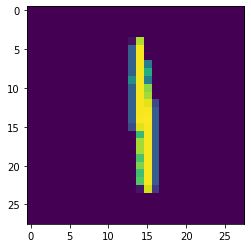

In [43]:
plt.imshow(X_test[5000].reshape(28,28)) 
X_test5000PCA = sklearn_pca.transform(X_test[5000].reshape(-1, 1).T)
print(logisticRegr.predict(X_test5000PCA))